In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the California dataset
california = fetch_california_housing()
X, y = california.data, california.target

In [3]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [4]:
len(X[1])

8

In [5]:
# Normalize the data
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [6]:
# Convert the data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [7]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.1, random_state=42)


In [8]:
X_train

tensor([[-0.0176,  0.9821, -0.0659,  ..., -0.0056, -0.8062,  0.6387],
        [ 2.1772,  1.8562,  0.7255,  ..., -0.0454,  0.9823, -1.4426],
        [-0.1050,  0.1081, -0.7150,  ..., -0.0709,  0.8559, -1.2879],
        ...,
        [-0.4928,  0.5849, -0.5829,  ...,  0.0252, -0.7500,  0.5938],
        [ 0.9730, -1.0838,  0.3906,  ...,  0.0104,  0.9121, -1.1931],
        [-0.6817,  1.8562, -0.8191,  ..., -0.0926,  1.0010, -1.4227]])

In [9]:
# Define the neural network
class RegressionNet(nn.Module):
  def __init__(self):
    super(RegressionNet, self).__init__()
    self.fc1 = nn.Linear(8, 64) # 8 features, 64 hidden units
    self.fc2 = nn.Linear(64, 1) # 64 hidden units, 1 output (for regression)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [10]:
# Initizliae the model and choose a loss function and optimizer
model = RegressionNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [11]:
# Training model
epochs = 1000
for epoch in range(epochs):
  model.train()  # Set the model in training mode
  optimizer.zero_grad()  # Zero gradients from the previous iteration

  # Forward pass
  predictions = model(X_train)
  loss = criterion(predictions, y_train)

  # Backward pass and optimization
  loss.backward()
  optimizer.step()

  if (epoch + 1) % 100 == 0:
      print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

Epoch [100/1000], Loss: 0.4081
Epoch [200/1000], Loss: 0.3653
Epoch [300/1000], Loss: 0.3337
Epoch [400/1000], Loss: 0.3120
Epoch [500/1000], Loss: 0.3005
Epoch [600/1000], Loss: 0.2924
Epoch [700/1000], Loss: 0.2856
Epoch [800/1000], Loss: 0.2800
Epoch [900/1000], Loss: 0.2754
Epoch [1000/1000], Loss: 0.2710


In [12]:
# Evaluation
model.eval()  # Set the model in evaluation mode

with torch.no_grad():
    test_predictions = model(X_test)
    test_loss = criterion(test_predictions, y_test)
    print(f"Test Loss: {test_loss.item():.4f}")

Test Loss: 0.3061


/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


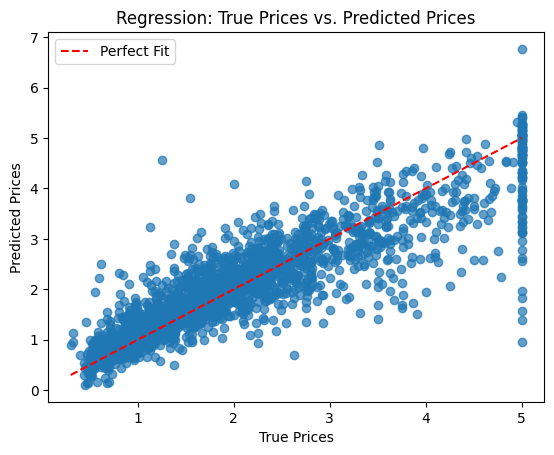

In [13]:
# Plot the original data and the fitted line
plt.scatter(y_test, test_predictions, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Perfect Fit')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.title('Regression: True Prices vs. Predicted Prices')
plt.legend()
plt.show()